In [1]:
#importing libraries that will be used
#in the program and reading the csv file
#of the dataset
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

myDataset = pd.read_csv("C:/Users/User/Desktop/OnlineRetail.csv", encoding = 'unicode_escape')

In [2]:
#displaying the dataset in the form of a table
myDataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#data cleaning
myDataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
myDataset.dropna(inplace=True)
myDataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# question 1

In [5]:
#question 1
#displaying Description of the most product 
myDataset.Description.mode()

0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object

# question 2

In [6]:
#question 2

#creating a frame which stores dataset of a single country which is Australia
#Adding a quantity of a single product by  description to compare products with
#to find the mostly sourced

myDatasetAu = myDataset[myDataset['Country']=='Australia']
groupedProduct = myDatasetAu.groupby('Description',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(1)

,Description,Quantity
287,MINI PAINT SET VINTAGE,2916


# question 3

In [7]:
#question 3

#changing InvoiceDate from String to Date
#displaying the mode of the time in invoiceDate

myDataset['InvoiceDate'] = pd.to_datetime(myDataset['InvoiceDate'],format ='%m/%d/%Y %H:%M')
myDataset.InvoiceDate.dt.time.mode()

0    13:35:00
dtype: object

# question 4

In [8]:
#question 4

#creating a frame which stores dataset of a gro which is Australia
#Adding a quantity of a single product by  description to get

temp_myDataset = myDataset.groupby(['CustomerID'],as_index=False)['Country'].count().sort_values(by='Country', ascending= True)
transaction_myDataset = temp_myDataset.rename(columns = {'Country':'Number of countries'})
transaction_myDataset.head()


,CustomerID,Number of countries
4045,17846.0,1
3991,17763.0,1
777,13366.0,1
3126,16579.0,1
793,13391.0,1


In [9]:
#question 4

#creating the frame that stores the number of countries greater than 1
#And counting the customers in countries greater than 1

numCountryData_myDataset = transaction_myDataset[transaction_myDataset['Number of countries'] > 1 ]
numCountryData_myDataset.CustomerID.count()

4293

# question 5

In [10]:
#question 5

#creating the frame that stores data that contains the  SPACEBOY BIRTHDAY CARD
#And displaying the mode the countries of the frame

myDatasetDesc = myDataset[myDataset['Description']=='SPACEBOY BIRTHDAY CARD']
myDatasetDesc.Country.mode()


0    United Kingdom
dtype: object

# question 6

In [11]:
#question 6

#creating the frame that stores data that the grouped InvoiceNo','CustomerID, InvoiceDate
#to count number of products

temp_myDataset =myDataset.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_myDataset = temp_myDataset.rename(columns = {'InvoiceDate':'NumberOfProducts'})
transaction_myDataset.head()

,InvoiceNo,CustomerID,NumberOfProducts
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [12]:
#question 6
#displaying the average of transaction_myDataset dataset

transaction_myDataset.describe()

,CustomerID,NumberOfProducts
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


In [13]:
#question 6
myDataset.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()

count    22190.000000
mean        17.876566
std         22.872614
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
Name: StockCode, dtype: float64

# question 7

In [14]:
#question 7

#copying the original data frame to the new one in order to add some columns without affeccting it
#cancelling the cancelled transactions to prevent the negative values of the quantity
#creating new columns for total day and month

PurchasesDataset= myDataset.copy()
PurchasesDataset = PurchasesDataset[~PurchasesDataset['InvoiceNo'].astype(str).str.contains('C')]
PurchasesDataset['AmountMadeBySupplier'] = PurchasesDataset['Quantity'] * PurchasesDataset['UnitPrice'] 
PurchasesDataset['Day'] = PurchasesDataset.InvoiceDate.dt.date
PurchasesDataset['Month'] = PurchasesDataset.InvoiceDate.dt.month
PurchasesDataset['Year'] = PurchasesDataset.InvoiceDate.dt.year.astype(int)
PurchasesDataset['InvoiceDate'] = pd.to_datetime(PurchasesDataset['InvoiceDate'],format ='%m/%d/%Y %H:%M')
PurchasesDataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountMadeBySupplier,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010


In [15]:
temp_PurchasesDataset =PurchasesDataset.groupby(['Day'],as_index=True)['Day','AmountMadeBySupplier'].sum()

temp_PurchasesDataset

,AmountMadeBySupplier
Day,
2010-12-01,46376.49
2010-12-02,47316.53
2010-12-03,23921.71
2010-12-05,31771.60
2010-12-06,31215.64
...,...
2011-12-05,58202.21
2011-12-06,46144.04
2011-12-07,69354.21


In [16]:
temp_PurchasesDataset =PurchasesDataset.groupby(['Year','Month'],as_index=True)['Day','AmountMadeBySupplier'].sum()

temp_PurchasesDataset

AmountMadeBySupplier
Year Month                      
2010 12               572713.890
2011 1                569445.040
     2                447137.350
     3                595500.760
     4                469200.361
     5                678594.560
     6                661213.690
     7                600091.011
     8                645343.900
     9                952838.382
     10              1039318.790
     11              1161817.380
     12               518192.790

# question 8

In [17]:
#question 8

myDatasetBowl = myDataset[myDataset['Description']== 'PINK CAT BOWL']
myDatasetBowl.CustomerID.nunique()

30

In [18]:
#question 8
#displaying the countries which its customers has pink cats 

groupedBowl =myDatasetBowl.groupby('Country',as_index=False)['CustomerID'].count()
groupedBowl.Country

0    United Kingdom
1       Unspecified
Name: Country, dtype: object

# question 9

In [19]:
#question 9

#creating a frame myDatasetDesc that only involves the data
# whose description has the string CHRISTMAS 

myDatasetDesc =myDataset.loc[myDataset.Description.str.contains(pat = 'CHRISTMAS', na = False)]
myDatasetDesc.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom
122,536381,22086,PAPER CHAIN KIT 50'S CHRISTMAS,4,2010-12-01 09:41:00,2.95,15311.0,United Kingdom
172,536385,85049A,TRADITIONAL CHRISTMAS RIBBONS,12,2010-12-01 09:56:00,1.25,17420.0,United Kingdom
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,2010-12-01 10:03:00,8.50,12431.0,Australia
211,536390,22941,CHRISTMAS LIGHTS 10 REINDEER,2,2010-12-01 10:19:00,8.50,17511.0,United Kingdom


In [20]:
#question 9

#displaying the most time that transactions of myDatasetDesc seems to happen 

myDatasetDesc.InvoiceDate.dt.time.mode()

0    12:26:00
dtype: object

# question 10

In [21]:
#question 10

#getting cancelled transactions
cancelledOrders = myDataset[myDataset['InvoiceNo'].astype(str).str.contains('C')]
cancelledOrders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [22]:
#question 10

#calculating maximum cancelled orders
temp_cancelled_orders = cancelledOrders.groupby('Country',as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=True)
transaction_cancelled_orders = temp_cancelled_orders.rename(columns = {'InvoiceNo':'Number of Cancelled orders'})
transaction_cancelled_orders.max()

Country                       United Kingdom
Number of Cancelled orders              7533
dtype: object

In [23]:
#displaying countries with highest number of cancellation
transaction_cancelled_orders.loc[transaction_cancelled_orders['Number of Cancelled orders'] == 7533]

,Country,Number of Cancelled orders
27,United Kingdom,7533


In [24]:
#question 10
#calculating minimum cancelled orders
transaction_cancelled_orders.min()

Country                       Australia
Number of Cancelled orders            1
dtype: object

In [25]:
#displaying countries with lowest number of cancellation
transaction_cancelled_orders.loc[transaction_cancelled_orders['Number of Cancelled orders'] == 1]

,Country,Number of Cancelled orders
21,Saudi Arabia,1
12,Greece,1
8,European Community,1


# question 11

In [26]:
#question 11

#getting countries with alarm clocks in Description
alarm_clocks = myDataset[myDataset['Description'].astype(str).str.contains('ALARM CLOCK')]
alarm_clocks.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
149,536382,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-01 09:45:00,3.75,16098.0,United Kingdom
205,536389,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-01 10:03:00,3.75,12431.0,Australia


In [27]:
#question 11
#displaying the country that has sold the highest  number of alarm clocks and its and its maximum number  

temp_alarm_clocks = alarm_clocks.groupby('Country',as_index=False)['Description'].count().sort_values(by='Description', ascending=False)
transaction_alarm_clocks = temp_alarm_clocks.rename(columns = {'Description':'Number of Alarm clocks'})
transaction_alarm_clocks.max()

Country                   Unspecified
Number of Alarm clocks           3159
dtype: object

In [28]:
#displaying a country which seems to rely on ALARM CLOCKS 
transaction_alarm_clocks.loc[transaction_alarm_clocks['Number of Alarm clocks'] ==3159]

,Country,Number of Alarm clocks
19,United Kingdom,3159


# question 12

In [29]:
#question 12
# creating a time series data set called dateIndexDataset
dateIndexDataset =myDataset.copy()
PurchasesDataset = dateIndexDataset[~dateIndexDataset['InvoiceNo'].astype(str).str.contains('C')]
dateIndexDataset['InvoiceDate'] = pd.to_datetime(dateIndexDataset['InvoiceDate'],format ='%m/%d/%Y %H:%M')
dateIndexDataset = dateIndexDataset.set_index(dateIndexDataset['InvoiceDate'])
dateIndexDataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
#question 12

#creating a week column to dateIndexDataset
dateIndexDataset['week'] = dateIndexDataset.index.week
dateIndexDataset.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,week
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,48
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,48
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,48
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,48
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,48


In [31]:
#question 12

#Extracting data from only France
#creating a column of number of items purchase from France 
dateIndexDatasetFC = dateIndexDataset[dateIndexDataset['Country']=='France']
groupedItemsFC = dateIndexDatasetFC.groupby(['week','Country'],as_index = False)['Quantity'].sum().sort_values(by='week', ascending=False)
groupedItemsColumnFC = groupedItemsFC.rename(columns = {'Quantity':'numberOfItems'})
groupedItemsColumnFC.head()

,week,Country,numberOfItems
50,51,France,847
49,50,France,529
48,49,France,4251
47,48,France,5703
46,47,France,2275


In [32]:
#question 12

#Extracting data from only Portugal
#creating a column of number of items purchase from Portugal 
dateIndexDatasetPG = dateIndexDataset[dateIndexDataset['Country']=='Portugal']
groupedItemsPG = dateIndexDatasetPG.groupby(['week','Country'],as_index = False)['Quantity'].sum().sort_values(by='week', ascending=False)
groupedItemsColumnPG = groupedItemsPG.rename(columns = {'Quantity':'numberOfItems'})
groupedItemsColumnPG.head()

,week,Country,numberOfItems
30,50,Portugal,154
29,49,Portugal,1260
28,48,Portugal,1099
27,47,Portugal,526
26,46,Portugal,230


In [33]:
# question 12 
#merging both countries number of items frames on week 

CombDataset = pd.merge(groupedItemsColumnPG,groupedItemsColumnFC, on = 'week')
CombDataset.columns = ['week','CountryPort','numberOfItemsPort','CountryFra','numberOfItemsFra']
CombDataset.head()

,week,CountryPort,numberOfItemsPort,CountryFra,numberOfItemsFra
0,50,Portugal,154,France,529
1,49,Portugal,1260,France,4251
2,48,Portugal,1099,France,5703
3,47,Portugal,526,France,2275
4,46,Portugal,230,France,4515


# question 13 (A) LinearRegression model

In [34]:
# question 13
myDataset['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [35]:
#model

In [36]:
myDataset.loc[myDataset['InvoiceDate'].dt.date > dt.date(2011,11,30)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,-8,2011-12-01 08:12:00,4.15,13853.0,United Kingdom
516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-1,2011-12-01 08:14:00,1.25,15197.0,United Kingdom
516386,C579890,23374,RED SPOT PAPER GIFT BAG,-1,2011-12-01 08:14:00,0.82,15197.0,United Kingdom
516387,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,2011-12-01 08:14:00,0.85,15197.0,United Kingdom
516388,C579891,23485,BOTANICAL GARDENS WALL CLOCK,-1,2011-12-01 08:18:00,25.00,13644.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [37]:
modelData = myDataset[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']]
modelData

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [38]:
modelData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [39]:

modelData['Sales'] = myDataset['Quantity'] * myDataset['UnitPrice']
modelData['Day'] = myDataset['InvoiceDate'].dt.day

modelData

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9


In [40]:
withoutC = modelData[~modelData['InvoiceNo'].astype(str).str.contains('C')]
withoutC

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9


In [41]:
salesfrom = withoutC.loc[withoutC['InvoiceDate'].dt.date > dt.date(2011,11,30)]
salesfrom['Sales']=salesfrom['Sales'].astype(int)
salesfrom['Date']=withoutC['InvoiceDate'].dt.date
salesfrom

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day,Date
516403,579899,23301,GARDENERS KNEELING PAD KEEP CALM,24,2011-12-01 08:33:00,1.65,15687.0,United Kingdom,39,1,2011-12-01
516404,579899,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,2011-12-01 08:33:00,5.95,15687.0,United Kingdom,17,1,2011-12-01
516405,579899,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,4,2011-12-01 08:33:00,3.75,15687.0,United Kingdom,15,1,2011-12-01
516406,579899,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,2011-12-01 08:33:00,2.89,15687.0,United Kingdom,17,1,2011-12-01
516407,579899,71477,COLOURED GLASS STAR T-LIGHT HOLDER,4,2011-12-01 08:33:00,3.95,15687.0,United Kingdom,15,1,2011-12-01
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10,9,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,9,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16,9,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16,9,2011-12-09


,Day,Date,SalesPerDay
0,1,2011-12-01,43467
1,2,2011-12-02,43743
2,4,2011-12-04,19385
3,5,2011-12-05,56533
4,6,2011-12-06,44894
5,7,2011-12-07,68332
6,8,2011-12-08,49297
7,9,2011-12-09,184073


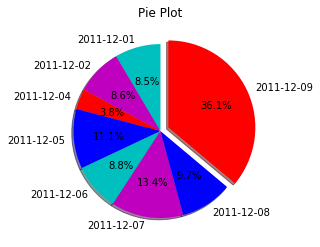

In [42]:
#preparing a pie chart to show sales per day from 2011/12/1
salesfro = salesfrom.groupby(['Day','Date'],as_index=False)['Sales'].sum()
transaction_myDataset = salesfro.rename(columns = {'Sales':'SalesPerDay'})

transaction_myDataset['SalesPerDay'] = transaction_myDataset['SalesPerDay'].astype(int)
x = transaction_myDataset.SalesPerDay
lab = transaction_myDataset.Date
cols = ['c','m','r','b','c','m','b','r']

plt.pie(x,
        labels=lab,
        colors=cols,
        startangle=90,
        shadow=True,
        explode=(0,0,0,0,0,0,0,0.1),
        autopct='%1.1f%%'
      )
        
plt.title('Pie Plot')
plt.show

transaction_myDataset



In [43]:
#building model
import numpy as np
y = np.array(salesfrom[['Sales']])

In [44]:
salesfrom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17304 entries, 516403 to 541908
Data columns (total 11 columns):
InvoiceNo      17304 non-null object
StockCode      17304 non-null object
Description    17304 non-null object
Quantity       17304 non-null int64
InvoiceDate    17304 non-null datetime64[ns]
UnitPrice      17304 non-null float64
CustomerID     17304 non-null float64
Country        17304 non-null object
Sales          17304 non-null int32
Day            17304 non-null int64
Date           17304 non-null object
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 1.5+ MB


In [45]:
X = np.array(salesfrom[['Day','UnitPrice','CustomerID','Quantity']])

In [46]:
X.shape

(17304, 4)

In [47]:
y.shape

(17304, 1)

In [48]:
from sklearn import model_selection, linear_model

In [49]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
X_train.shape

(11593, 4)

In [51]:
y_train.shape

(11593, 1)

In [52]:
#testing Linear Regression train accuracy
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)


0.9986262004866917

In [53]:
#testing Linear Regression test accuracy
model.fit(X_test, y_test)
model.score(X_test, y_test)


0.7833655943806382

# question 13 (B) random forest model

In [54]:
#random forest
from sklearn import ensemble

In [55]:
rf_model = ensemble.RandomForestClassifier(
    random_state=42,
    verbose=1
)

In [56]:
rf_model.fit(X_train, y_train)
rf_model.score(X_train, y_train)

C:\Users\Calista\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


0.9974984904683861

In [57]:
rf_model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


0.9119243565049904

In [58]:
#making more trees
rf_model = ensemble.RandomForestClassifier(
    n_estimators=5,
    random_state=42,
    verbose=1
)
print(rf_model)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)


C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9896489260760803
0.8903869725091927


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [59]:
rf_model = ensemble.RandomForestClassifier(
    n_estimators=20,
    random_state=42,
    verbose=1
)
print(rf_model)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.999396187354438
0.9196287865522675


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.2s finished


In [60]:
rf_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    verbose=1
)
print(rf_model)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished


1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9238312029416915


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished


In [61]:
#changing depth
rf_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    verbose=1
)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.288622444578625
0.28418840833479253


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


In [62]:
rf_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    verbose=1
)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8841542310014664
0.842409385396603


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished


In [63]:
rf_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    verbose=1
)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1.0
0.9269830152337594


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished


In [64]:
#adding maxfeatures
rf_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features=0.5,
    random_state=42,
    verbose=1
)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8841542310014664
0.842409385396603


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished


In [65]:
rf_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features=0.8,
    random_state=42,
    verbose=1
)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9177089623048391
0.8868849588513396


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished


In [66]:
#min samples leaf
rf_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features=0.8,
    min_samples_leaf=0.1,
    random_state=42,
    verbose=1
)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.2179763650478737
0.21432323586061985


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.8s finished


In [67]:
rf_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features=0.8,
    min_samples_leaf=3,
    random_state=42,
    verbose=1
)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9103769516087294
0.8818070390474523


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished


In [68]:
# samples to estimate the generalization accuracy
import sklearn.metrics as metrics
rf_model = ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features=0.8,
    oob_score=True,
    random_state=42
)
rf_model.fit(X_train, y_train)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))


C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


0.9177089623048391
0.8868849588513396


In [69]:
#random forest prediction
rf_model.predict(X_test)


array([  5, 102,   2, ...,  30,  19,   0])

In [70]:
#linear regression prediction
model.predict(X_test)


array([[ -1.49566588],
       [ 50.63206826],
       [ -3.58938211],
       ...,
       [ 35.95095303],
       [ 34.74774584],
       [-10.35058806]])

# question 14(A)  SVM model

In [71]:
salesfro = salesfrom.groupby(['Day','Date'],as_index=False)['Sales'].sum()
transaction_myDataset = salesfro.rename(columns = {'Sales':'SalesPerDay'})

In [72]:
#creating a frame to store country as coutryCode
salesfrom['CountryCode'] = salesfrom.Country
salesfrom

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day,Date,CountryCode
516403,579899,23301,GARDENERS KNEELING PAD KEEP CALM,24,2011-12-01 08:33:00,1.65,15687.0,United Kingdom,39,1,2011-12-01,United Kingdom
516404,579899,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,2011-12-01 08:33:00,5.95,15687.0,United Kingdom,17,1,2011-12-01,United Kingdom
516405,579899,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,4,2011-12-01 08:33:00,3.75,15687.0,United Kingdom,15,1,2011-12-01,United Kingdom
516406,579899,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,2011-12-01 08:33:00,2.89,15687.0,United Kingdom,17,1,2011-12-01,United Kingdom
516407,579899,71477,COLOURED GLASS STAR T-LIGHT HOLDER,4,2011-12-01 08:33:00,3.95,15687.0,United Kingdom,15,1,2011-12-01,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10,9,2011-12-09,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,9,2011-12-09,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16,9,2011-12-09,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16,9,2011-12-09,France


In [73]:
#creating a frame to store country as coutryCode in integers type
tempsalesfrom = salesfrom.groupby('Country',as_index=False)['Sales'].sum()
tempsalesfrom['CountryCode']=tempsalesfrom.index.astype(int) +1
tempsalesfrom

,Country,Sales,CountryCode
0,Austria,680,1
1,Belgium,1377,2
2,Channel Islands,197,3
3,Denmark,164,4
4,EIRE,6831,5
5,Finland,1228,6
6,France,7137,7
7,Germany,7849,8
8,Greece,667,9
9,Iceland,220,10


In [74]:
#replacing countries with numbers accordingly
salesfrom['CountryCode'] = [s.replace('Austria','1')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Belgium','2')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Channel Islands','3')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Denmark','4')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('EIRE','5')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Finland','6')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('France','7')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Germany','8')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Greece','9')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Iceland','10')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Italy','11')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Netherlands','12')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Norway','13')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Portugal','14')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Spain','15')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('Sweden','16')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('USA','17')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] = [s.replace('United Kingdom','18')for s in salesfrom['CountryCode']]
salesfrom['CountryCode'] =salesfrom['CountryCode'].astype(int)


C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [75]:
salesfrom

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Day,Date,CountryCode
516403,579899,23301,GARDENERS KNEELING PAD KEEP CALM,24,2011-12-01 08:33:00,1.65,15687.0,United Kingdom,39,1,2011-12-01,18
516404,579899,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,2011-12-01 08:33:00,5.95,15687.0,United Kingdom,17,1,2011-12-01,18
516405,579899,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,4,2011-12-01 08:33:00,3.75,15687.0,United Kingdom,15,1,2011-12-01,18
516406,579899,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,2011-12-01 08:33:00,2.89,15687.0,United Kingdom,17,1,2011-12-01,18
516407,579899,71477,COLOURED GLASS STAR T-LIGHT HOLDER,4,2011-12-01 08:33:00,3.95,15687.0,United Kingdom,15,1,2011-12-01,18
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10,9,2011-12-09,7
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,9,2011-12-09,7
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16,9,2011-12-09,7
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16,9,2011-12-09,7


In [76]:
#preparing the model
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(salesfrom, test_size = 0.3, random_state = 1)

In [77]:
#training and testing the model 
X_train = training_set.iloc[:,[0,11]].values
Y_train = training_set.iloc[:,11].values
X_test = test_set.iloc[:,[0,11]].values
Y_test = test_set.iloc[:,11].values

In [78]:
#importing SVC from SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 1)
classifier.fit(X_train,Y_train)

C:\Users\Calista\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [79]:
# predicting a country
Y_pred = classifier.predict(X_test)

In [80]:
#putting predicted values in Prediction column
test_set['Predictions'] = Y_pred.astype(int)

C:\Users\Calista\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5192 entries, 529778 to 534040
Data columns (total 13 columns):
InvoiceNo      5192 non-null object
StockCode      5192 non-null object
Description    5192 non-null object
Quantity       5192 non-null int64
InvoiceDate    5192 non-null datetime64[ns]
UnitPrice      5192 non-null float64
CustomerID     5192 non-null float64
Country        5192 non-null object
Sales          5192 non-null int32
Day            5192 non-null int64
Date           5192 non-null object
CountryCode    5192 non-null int32
Predictions    5192 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(5)
memory usage: 507.0+ KB


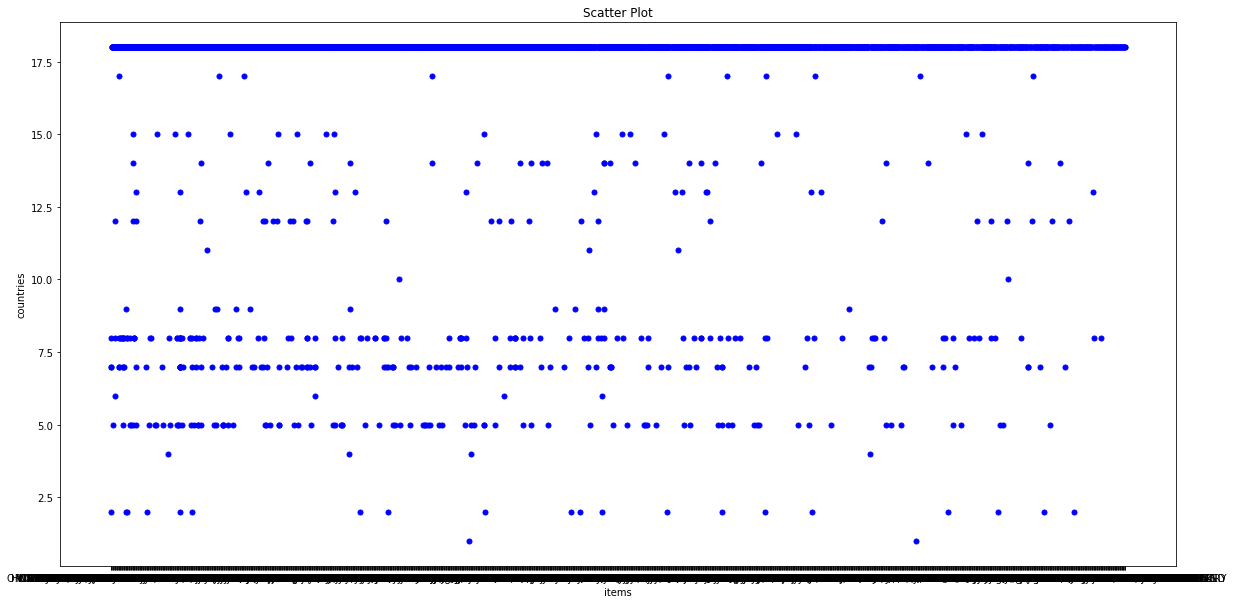

In [82]:
#creating a scatter plot showing predictions vs items  
x = test_set.Description
y = test_set.Predictions



plt.scatter(x,y,color='b',s=25)


plt.xlabel('items')
plt.ylabel('countries')
plt.title('Scatter Plot')
plt.gcf().set_size_inches((20,10))
plt.show()

In [83]:
test_set.Predictions.shape

(5192,)

In [84]:
test_set.Description.shape

(5192,)

# question 14(B)  K-Means

In [85]:
#Preparing for K-Means and analysis for sales and outliers
myData =myDataset[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']]
myData["Revenue"] = myData["UnitPrice"]*myData["Quantity"]
myData["InvoiceDate"] = pd.to_datetime(myData["InvoiceDate"]).dt.date
myData["InvoiceMonth"] = pd.DatetimeIndex(myData["InvoiceDate"]).month
myData["InvoiceYear"] = pd.DatetimeIndex(myData["InvoiceDate"]).year

myData.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010


In [86]:
myData=myData.drop("Revenue", axis=1)

Text(0, 0.5, 'TotalCost')

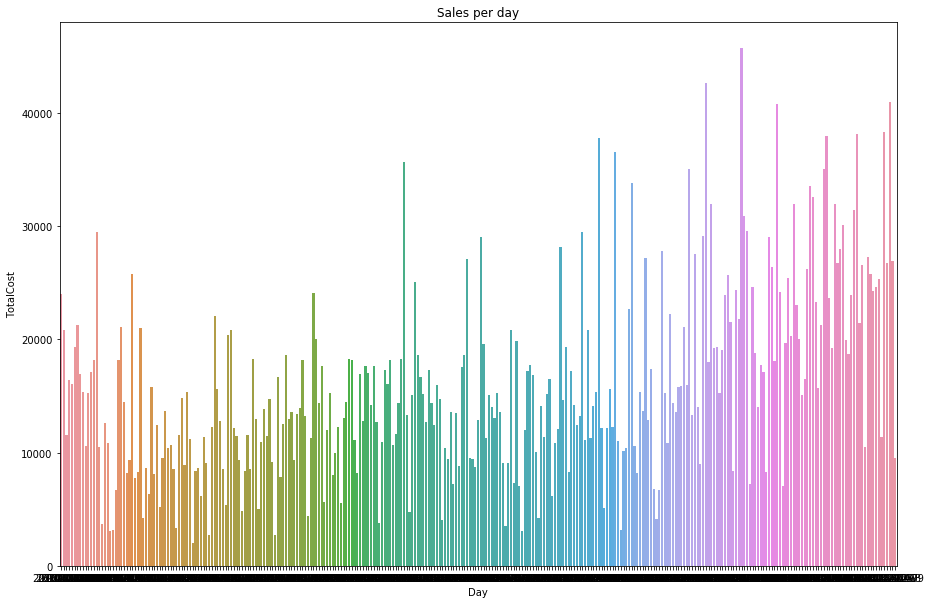

In [87]:
#MONTHLY ITEMS SOLD
myData_quantity = myData.groupby(["InvoiceDate","InvoiceMonth"] )["Quantity"].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceDate",y="Quantity",  data=myData_quantity)
plt.title("Sales per day")
plt.xlabel("Day")
plt.ylabel("TotalCost")

In [88]:
# New Attribute : Monetary

myData['Amount'] = myData['Quantity']*myData['UnitPrice']
rfm_m = myData.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [89]:
# New Attribute : Frequency

rfm_f =myData.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [90]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [91]:
# New Attribute : Recency

# Convert to datetime to proper datatype

myData['InvoiceDate'] = pd.to_datetime(myData['InvoiceDate'],format='%Y-%m-%d %H:%M')

In [92]:
# Compute the maximum date to know the last transaction date

max_date = max(myData['InvoiceDate'])
max_date

Timestamp('2011-12-09 00:00:00')

In [93]:
# Compute the difference between max date and transaction date

myData['Diff'] = max_date - myData['InvoiceDate']
myData.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceYear,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,12,2010,15.30,373 days
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,12,2010,20.34,373 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,12,2010,22.00,373 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,12,2010,20.34,373 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,12,2010,20.34,373 days


In [94]:
# Compute last transaction date to get the recency of customers

rfm_p =myData.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days
1,12347.0,2 days
2,12348.0,75 days
3,12349.0,18 days
4,12350.0,310 days


In [95]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [96]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,310


Text(0.5, 0, 'Attributes')

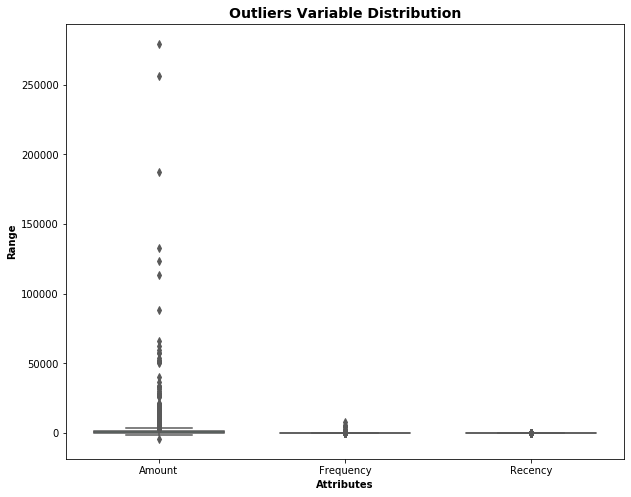

In [97]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data =rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [98]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [99]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [100]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.296184
1,1.731617,1.042467,-0.901811
2,0.300128,-0.463636,-0.179044
3,0.277517,-0.044720,-0.743397
4,-0.533235,-0.603275,2.147671


In [101]:

# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [102]:
kmeans.labels_

array([1, 0, 3, ..., 1, 3, 3])

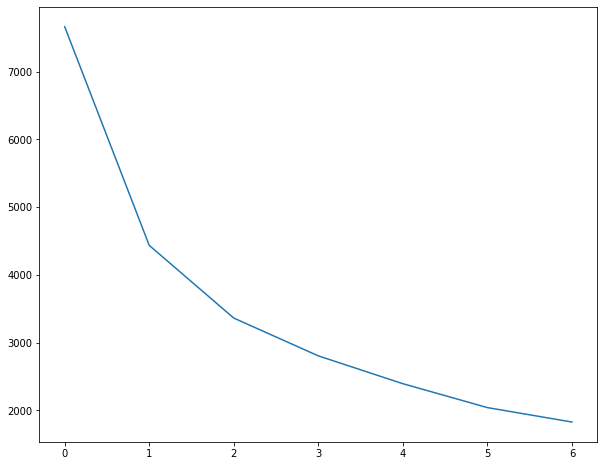

In [103]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [104]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.5413450122765807
For n_clusters=3, the silhouette score is 0.5083579479284236
For n_clusters=4, the silhouette score is 0.47770976672887455
For n_clusters=5, the silhouette score is 0.464292530095112
For n_clusters=6, the silhouette score is 0.4170135519367777
For n_clusters=7, the silhouette score is 0.4174536652476536
For n_clusters=8, the silhouette score is 0.40629148734748666


In [105]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
 kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2])

In [107]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,2,1
2,12348.0,1797.24,31,75,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,310,0


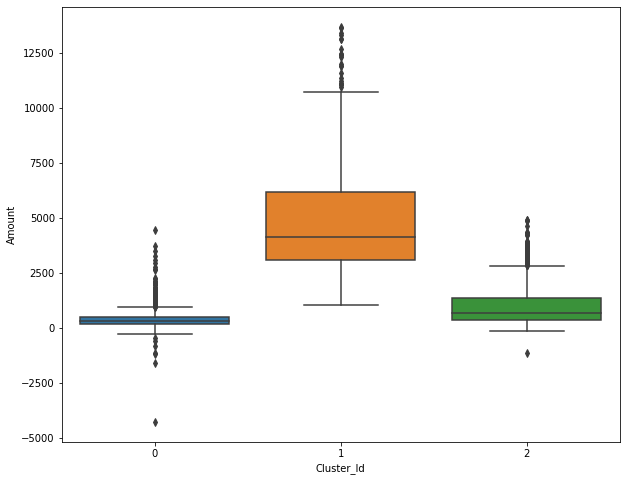

In [108]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

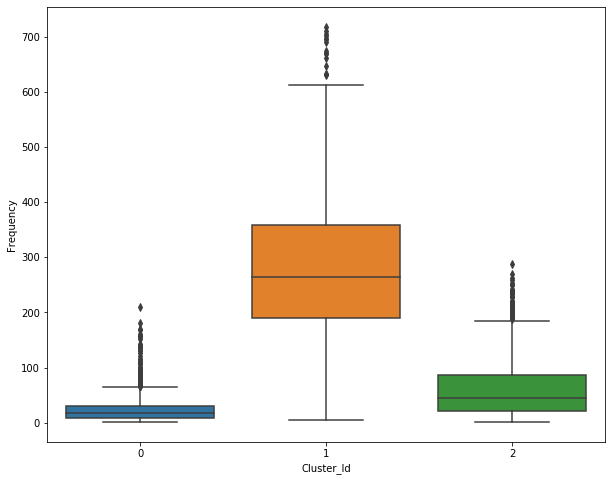

In [109]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

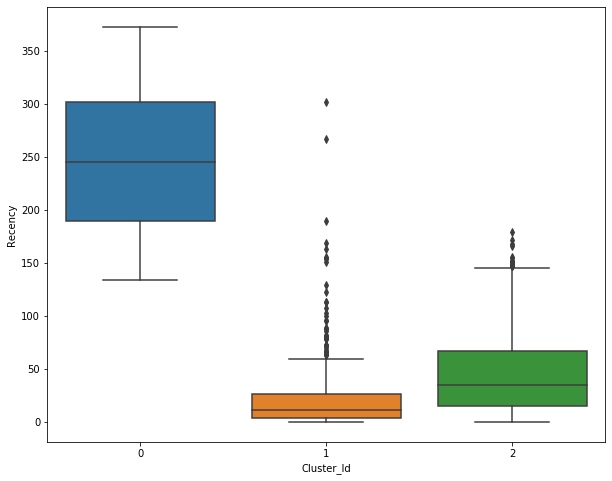

In [110]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)